In [154]:
library(tidyverse)
library(tidymodels)
library(themis)
library(dplyr)
options(repr.matrix.rows = 5)

players_url <- "https://raw.githubusercontent.com/elilyliu/Group-4-project/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/elilyliu/Group-4-project/refs/heads/main/sessions.csv"

players <- read_csv(players_url) |> rename(age = Age)
sessions <- read_csv(sessions_url)

players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [155]:
players <- players |>
    mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")),
           name = as_factor(name),
           gender = as_factor(gender),
           contributor_type = case_when(
              played_hours > 3 ~ "High",
              played_hours <= 3 & played_hours > 1 ~ "Medium",
              played_hours <= 1 ~ "Low")) |>
    mutate(contributor_type = factor(contributor_type)) |>
    drop_na()

players

experience,subscribe,hashedEmail,played_hours,name,gender,age,contributor_type
<fct>,<lgl>,<chr>,<dbl>,<fct>,<fct>,<dbl>,<fct>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,High
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,High
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,Low
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,Low
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,Medium


In [222]:
selected_players <- players  |>
    mutate(experience_label = as.numeric(experience),
          gender_label = as.numeric(gender)) |>
    select(experience, experience_label, gender, gender_label, contributor_type, age)

selected_players

experience,experience_label,gender,gender_label,contributor_type,age
<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
Pro,4,Male,1,High,9
Veteran,5,Male,1,High,17
Veteran,5,Male,1,Low,17
⋮,⋮,⋮,⋮,⋮,⋮
Amateur,2,Prefer not to say,4,Low,17
Amateur,2,Male,1,Medium,17


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5851852,3,0.05341557,Preprocessor1_Model01
2,accuracy,multiclass,0.6074074,3,0.05185185,Preprocessor1_Model02
3,accuracy,multiclass,0.5555556,3,0.08413198,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,accuracy,multiclass,0.4666667,3,0.05879447,Preprocessor1_Model09
10,accuracy,multiclass,0.4666667,3,0.05879447,Preprocessor1_Model10


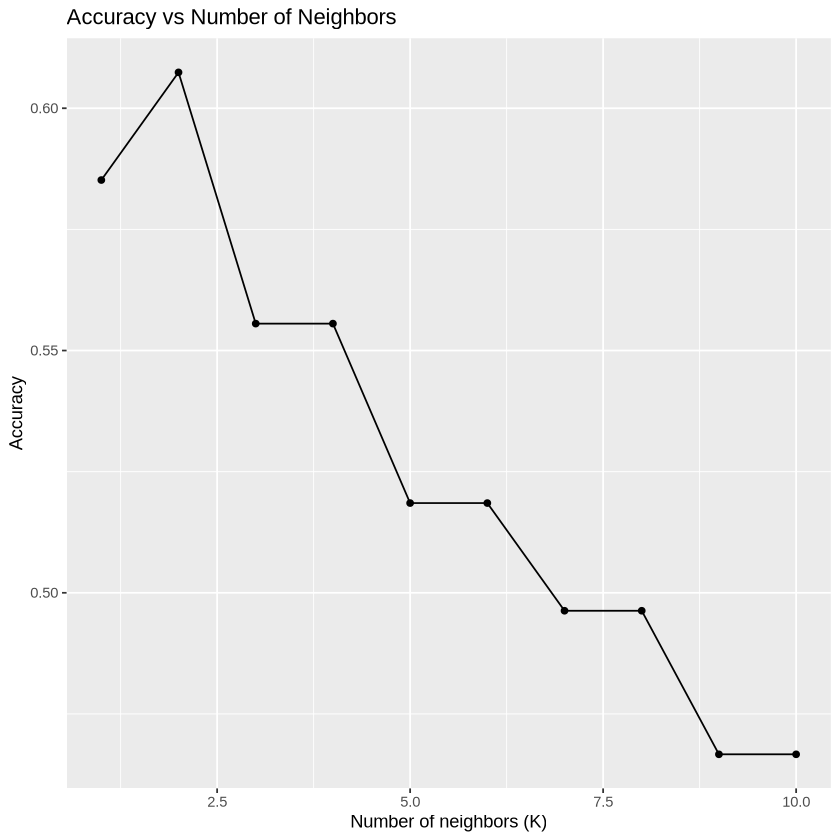

In [223]:
set.seed(2222) 
player_split <- initial_split(selected_players, prop = 0.7, strata = contributor_type)  
player_train <- training(player_split)   
player_test <- testing(player_split)

player_recipe <- recipe(contributor_type ~ experience_label + gender_label + age , data = player_train) |>
    step_normalize(all_predictors()) |>
    step_upsample(contributor_type, over_ratio = 2, skip = TRUE)

knn_tune <- nearest_neighbor(weight_func="rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

## use 3 fold because of lack of data
player_vfold <- vfold_cv(player_train, v = 3, strata = contributor_type)

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = player_vfold, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
cross_val_plot <- ggplot(knn_results, aes(x=neighbors, y=mean)) +
    geom_point() +
    geom_line() +
    labs(x="Number of neighbors (K)", y="Accuracy", title = "Accuracy vs Number of Neighbors")

knn_results

cross_val_plot

In [224]:
set.seed(2222) 

player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
    set_engine("kknn") |>
    set_mode("classification")

player_fit <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(player_spec) |>
    fit(data = player_train)

player_predictions <- predict(player_fit, player_test) |>
    bind_cols(player_test)

mnist_metrics <- player_predictions |>
    metrics(truth = contributor_type, estimate = .pred_class)


mnist_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.59322034
kap,multiclass,0.05030181


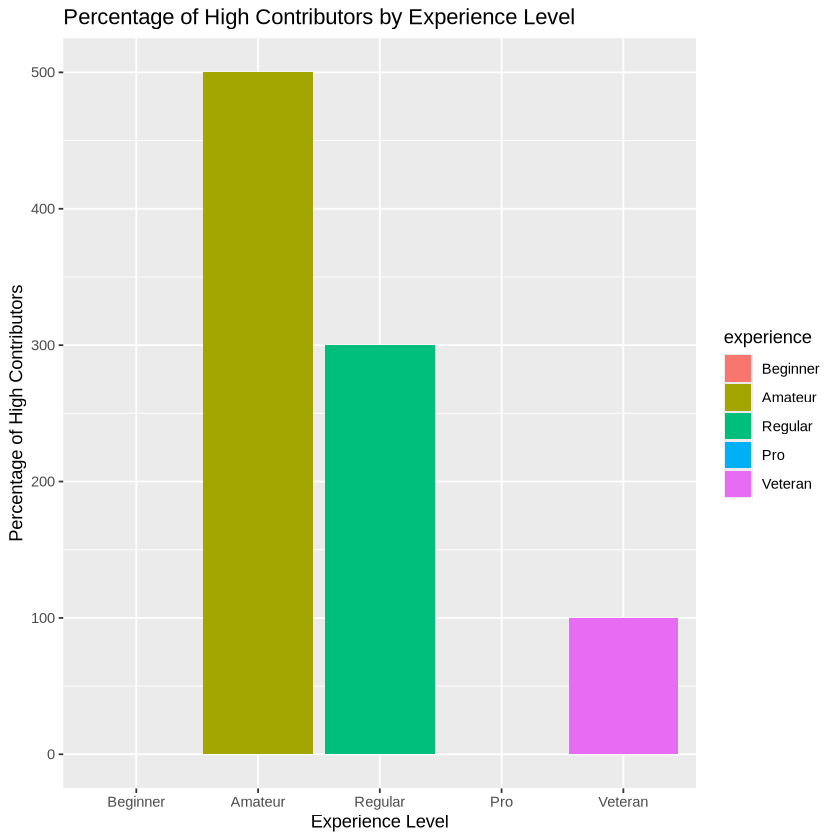

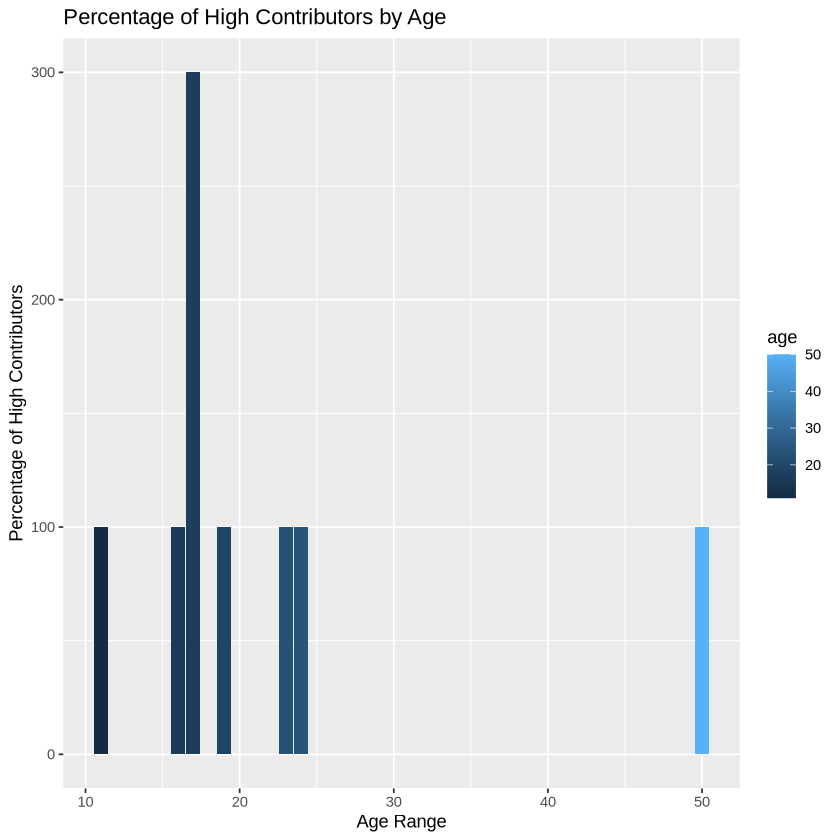

experience,age,gender,Low,High,Medium,total,high_percent,medium_percent,low_percent
<fct>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Beginner,17,Male,2,0,0,2,0,0,100
Beginner,17,Female,4,0,0,4,0,0,100
Beginner,22,Female,1,0,0,1,0,0,100
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,25,Prefer not to say,1,0,0,1,0,0,100
Veteran,44,Female,1,0,0,1,0,0,100


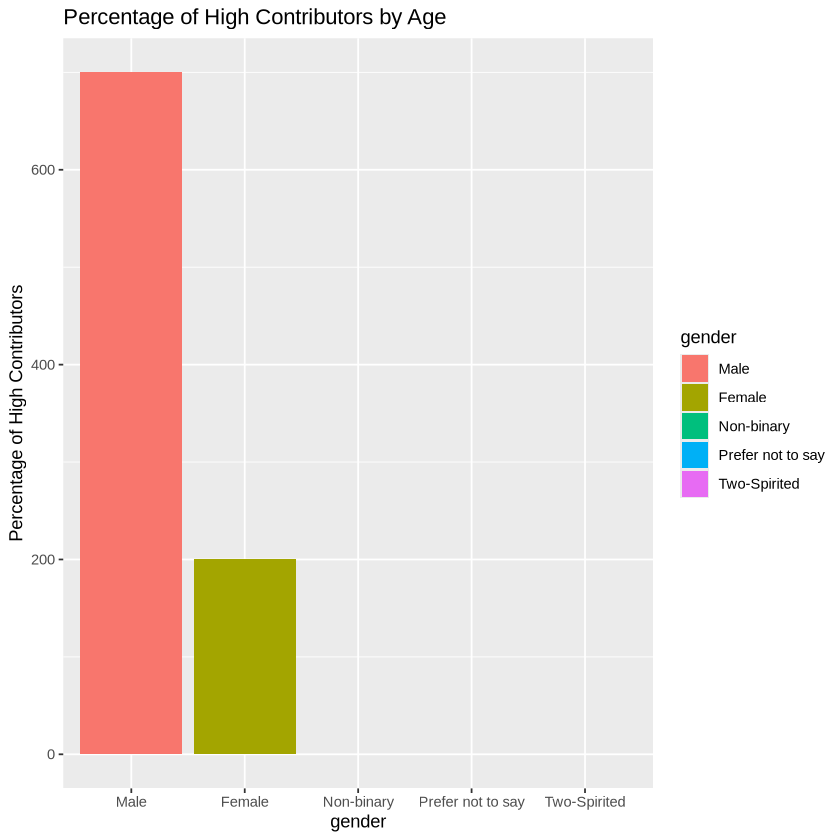

In [228]:
contributor_summary <- player_predictions |>
  group_by(experience, age, gender, .pred_class) |>
  summarise(count = n(), .groups = "drop") |>
  pivot_wider(names_from = .pred_class, values_from = count, values_fill = 0)

contributor_summary <- contributor_summary |>
  mutate(total = High + Medium + Low,
         high_percent = (High / total) * 100,
         medium_percent = (Medium / total) * 100,
         low_percent = (Low / total) * 100)
ggplot(contributor_summary, aes(x = experience, y = high_percent, fill = experience)) +
    geom_bar(stat = "identity") +
    labs(title = "Percentage of High Contributors by Experience Level", 
         x = "Experience Level", 
         y = "Percentage of High Contributors")

ggplot(contributor_summary, aes(x = age, y = high_percent, fill = age)) +
    geom_bar(stat = "identity") +
    labs(title = "Percentage of High Contributors by Age", 
         x = "Age Range", 
         y = "Percentage of High Contributors") 

ggplot(contributor_summary, aes(x = gender, y = high_percent, fill = gender)) +
    geom_bar(stat = "identity") +
    labs(title = "Percentage of High Contributors by Age", 
         x = "gender", 
         y = "Percentage of High Contributors") 

contributor_summary